## Laderas inestables en la alcaldía Álvaro Obregón

En este notebook se realizará un análisis exploratorio de los datos de "laderas inestables" en la alcaldía Álvaro Obregón, Ciudad de México. Los datos fueron obtenidos del Atlas de Riesgo de la Ciudad de México. 

Fuente: https://www.atlas.cdmx.gob.mx/datosabiertos2.html

In [2]:
# Importamos las librerías necesarias
import geopandas as gpd

In [3]:
# Cargamos el geojson
gdf = gpd.read_file('data/alvaro_obregon/peligro_por_inestabilidad_de_laderas.geojson')

# Ver las primeras filas
print(gdf.head())

# Ver información general
print(gdf.info())

# Ver el sistema de coordenadas (CRS)
print(gdf.crs)

   objectid  id   fenomeno                 taxonomia  r_p_v_e intensidad  \
0         1   1  Geológico  Inestabilidad de laderas  Peligro       Bajo   
1         2   2  Geológico  Inestabilidad de laderas  Peligro      Medio   
2         3   3  Geológico  Inestabilidad de laderas  Peligro       Alto   

                               descripcio  \
0  Peligro ante inestabilidad de laderas.   
1  Peligro ante inestabilidad de laderas.   
2  Peligro ante inestabilidad de laderas.   

                                              fuente cve_mun        alcaldia  \
0  Atlas de Peligros Naturales y Antropogénico pa...   09010  Álvaro Obregón   
1  Atlas de Peligros Naturales y Antropogénico pa...   09010  Álvaro Obregón   
2  Atlas de Peligros Naturales y Antropogénico pa...   09010  Álvaro Obregón   

            entidad      area_m2    perime_m  \
0  Ciudad de México  35868337.53   607175.73   
1  Ciudad de México  32192814.45  1205013.01   
2  Ciudad de México  28229314.42   636703.58   



### Inspección de los datos espaciales
A continuación, se realizará una inspección de los datos espaciales para identificar los tipos de geometrías presentes en el archivo geojson.

In [4]:
print(gdf.geom_type.value_counts())

MultiPolygon    3
Name: count, dtype: int64


### Resumen estadístico de los datos

A continuación, se realizará un resumen estadístico de los datos no espaciales. El detalle de cada evento reportado se encuentra en la columna "detalles". Se observa que el año en que se reportó el evento se encuentra en la columna "magni_num".

In [6]:
# Analizarla columna "detalles" para ver cuantos valores únicos tiene
print(gdf["intensidad"].value_counts())

intensidad
Bajo     1
Medio    1
Alto     1
Name: count, dtype: int64


In [8]:
# Ver area en m2
print(gdf["area_m2"].value_counts())

area_m2
35868337.53    1
32192814.45    1
28229314.42    1
Name: count, dtype: int64


In [9]:
# Ver los datos faltantes
print(gdf.isnull().sum())


objectid      0
id            0
fenomeno      0
taxonomia     0
r_p_v_e       0
intensidad    0
descripcio    0
fuente        0
cve_mun       0
alcaldia      0
entidad       0
area_m2       0
perime_m      0
geometry      0
dtype: int64


### Visualización inicial de los datos
A continuación, se realizará una visualización espacial inicial de los datos. Se observa como los polígonos representan las zonas de peligro por laderas inestables en la alcaldía Álvaro Obregón.

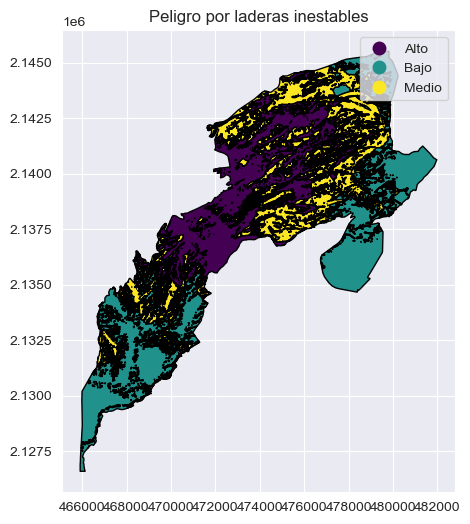

In [11]:
import matplotlib.pyplot as plt

gdf.plot(figsize=(10, 6), cmap="viridis", edgecolor="black", column="intensidad", legend=True)
plt.title("Peligro por laderas inestables")
plt.show()